# Key points of the modeling method:
    
1. Purpose of the Model:

The primary goal of this model is to predict the time it may take for a listed product to sell, assisting sellers in better understanding and strategizing around inventory management. Specifically, it categorizes listings into four distinct classes representing different sales durations.

2. Why XGBoost for This Classification Problem:

XGBoost is a robust ensemble learning technique that uses gradient boosting on decision trees. It is highly effective for structured data, allowing efficient handling of large datasets while addressing class imbalance through various tuning parameters. This makes it suitable for multi-class classification tasks like predicting sales duration, as it can capture non-linear relationships and interactions within features to improve accuracy.

3. Model Building Process:

(1)	Data Preparation: The data was processed and converted into a DMatrix, a format optimized for XGBoost training.

(2)	Parameter Tuning: The model was optimized with key parameters:

	learning_rate (set lower for smoother updates)

	max_depth (restricted to prevent overfitting)

    alpha and lambda (L1 and L2 regularization terms to manage complexity).

(6)	Training and Evaluation: 
The model was trained with cross-validation to find an optimal number of boosting rounds, ensuring the model generalizes well across data splits. The confusion matrix and various metrics (precision, recall, F1-score) were generated to assess the model’s performance on each class.

4. Tuning Strategy:

The model was tuned by adjusting hyperparameters such as learning rate, depth, and regularization. Additionally, cross-validation was used with early stopping to prevent overfitting. This approach allowed finding the optimal balance between model complexity and generalization.

5. Model evaluation:

(1)	General Performance: With an accuracy of around 62%, the model performs above random guessing (25% for four classes), indicating it successfully captures useful patterns in the data.

(2)	Class-Specific Performance: The model performs best for classes with higher support, like Classes 1 and 3, as reflected by their higher precision and recall. However, Class 2 shows weaker performance, suggesting it is more challenging to distinguish accurately.

(3)	Improvements:

Focus on improving recall for Class 2, potentially through additional feature engineering, oversampling, or class weight adjustments.
Consider using advanced techniques like stacking or ensemble methods for further performance improvements.
    
    
    
    

# Modeling part:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('transformed_ebay_data.csv')

In [5]:
df.head()

,Unnamed: 0,num__Price,num__Feedback Score,cat__Listing Type_Auction,cat__Listing Type_AuctionWithBIN,cat__Listing Type_FixedPrice,cat__Listing Type_StoreInventory,cat__Shipping Type_Calculated,cat__Shipping Type_CalculatedDomesticFlatInternational,cat__Shipping Type_Flat,cat__Shipping Type_FlatDomesticCalculatedInternational,cat__Shipping Type_Free,cat__Shipping Type_FreePickup,cat__Shipping Type_Freight,cat__Shipping Type_NotSpecified,cat__Top Rated Seller_False,cat__Top Rated Seller_True,cat__Condition_Acceptable,cat__Condition_Brand New,cat__Condition_Certified - Refurbished,cat__Condition_For parts or not working,cat__Condition_Good,cat__Condition_Like New,cat__Condition_New,cat__Condition_New other (see details),cat__Condition_New with box,cat__Condition_New with defects,cat__Condition_New with tags,cat__Condition_New without box,cat__Condition_New without tags,cat__Condition_New – Open box,cat__Condition_New/Factory Sealed,cat__Condition_Open box,cat__Condition_Pre-owned,cat__Condition_Ungraded,cat__Condition_Used,cat__Condition_Very Good,cat__Condition_nan,remainder__Title,remainder__Item ID,remainder__Currency,remainder__Category,remainder__Seller,remainder__Positive Feedback %,remainder__Shipping Cost,remainder__Buy It Now Available,remainder__Start Time,remainder__End Time,remainder__Store Name,remainder__Store URL,remainder__Gallery URL,remainder__Large Image URL,remainder__Super Size Image URL,remainder__View Item URL,remainder__Marketplace,remainder__Time duration,remainder__Store URL_flag,remainder__Large Image URL_flag,remainder__Super Size Image URL_flag,remainder__Exchange_rate,remainder__Price_in_USD
0,0,-0.072931,-0.302147,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chicken Soup for the Soul: Christmas Magic: 101 Holiday Tales -NEW IN CELLOPHANE,116382827420,USD,Books,45maxellen68,100.0,NaN,True,2024-11-06 15:45:12,2024-11-13 15:45:12,NaN,NaN,https://i.ebayimg.com/thumbs/images/g/C-MAAOSwVgZZrkJs/s-l140.jpg,NaN,NaN,https://www.ebay.com/itm/Chicken-Soup-Soul-Christmas-Magic-101-Holiday-Tales-NEW-CELLOPHANE-/116382827420,EBAY-US,7.000000,0,0,0,1.0,3.99
1,1,-0.064066,-0.302491,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CreativeHavenHome forthe Holidays Coloring Book (Adult Coloring Books Christmas),286082795097,USD,Books,jmratkowski95sh,100.0,0.0,False,2024-09-28 20:19:29,2024-11-28 21:19:29,NaN,NaN,https://i.ebayimg.com/thumbs/images/g/oooAAOSwUEFm-GS~/s-l140.jpg,https://i.ebayimg.com/00/s/MTUwMFgxMTM4/z/oooAAOSwUEFm-GS~/$_1.JPG,https://i.ebayimg.com/00/s/MTUwMFgxMTM4/z/oooAAOSwUEFm-GS~/$_3.JPG,https://www.ebay.com/itm/CreativeHavenHome-forthe-Holidays-Coloring-Book-Adult-Coloring-Books-Christmas-/286082795097,EBAY-US,61.041667,0,1,1,1.0,6.88
2,2,-0.064802,-0.303912,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Dead of Winter: Beware the Krampus and Other Wicked Christmas Creatures 2024,305886555883,USD,Books,bmrfq03kde46,70.0,0.0,False,2024-11-05 12:51:34,2024-12-05 06:51:14,NaN,NaN,https://i.ebayimg.com/thumbs/images/g/BzkAAOSwpB1nKb~M/s-l140.jpg,https://i.ebayimg.com/00/s/NTMwWDQ2Nw==/z/BzkAAOSwpB1nKb~M/$_1.JPG,https://i.ebayimg.com/00/s/NTMwWDQ2Nw==/z/BzkAAOSwpB1nKb~M/$_3.JPG,https://www.ebay.com/itm/Dead-Winter-Beware-Krampus-and-Other-Wicked-Christmas-Creatures-2024-/305886555883,EBAY-US,29.749769,0,1,1,1.0,6.64
3,3,-0.070170,3.955687,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Christmas with Martha Stewart Living Classic Crafts and Recipes for - VERY GOOD,267000460794,USD,Books,second.sale,98.4,0.0,False,2024-09-22 16:18:03,2024-11-22 17:18:03,SecondSalecom,http://stores.ebay.com/SecondSalecom,https://i.ebayimg.com/thumbs/

In [6]:
# View summary statistics of dataframe

In [50]:
df.shape

(127778, 63)

In [7]:
df.describe()

,Unnamed: 0,num__Price,num__Feedback Score,cat__Listing Type_Auction,cat__Listing Type_AuctionWithBIN,cat__Listing Type_FixedPrice,cat__Listing Type_StoreInventory,cat__Shipping Type_Calculated,cat__Shipping Type_CalculatedDomesticFlatInternational,cat__Shipping Type_Flat,cat__Shipping Type_FlatDomesticCalculatedInternational,cat__Shipping Type_Free,cat__Shipping Type_FreePickup,cat__Shipping Type_Freight,cat__Shipping Type_NotSpecified,cat__Top Rated Seller_False,cat__Top Rated Seller_True,cat__Condition_Acceptable,cat__Condition_Brand New,cat__Condition_Certified - Refurbished,cat__Condition_For parts or not working,cat__Condition_Good,cat__Condition_Like New,cat__Condition_New,cat__Condition_New other (see details),cat__Condition_New with box,cat__Condition_New with defects,cat__Condition_New with tags,cat__Condition_New without box,cat__Condition_New without tags,cat__Condition_New – Open box,cat__Condition_New/Factory Sealed,cat__Condition_Open box,cat__Condition_Pre-owned,cat__Condition_Ungraded,cat__Condition_Used,cat__Condition_Very Good,cat__Condition_nan,remainder__Item ID,remainder__Positive Feedback %,remainder__Shipping Cost,remainder__Time duration,remainder__Store URL_flag,remainder__Large Image URL_flag,remainder__Super Size Image URL_flag,remainder__Exchange_rate,remainder__Price_in_USD
count,127778.000000,1.277780e+05,1.277780e+05,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,1.277780e+05,127778.000000,101801.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000
mean,63888.500000,4.304028e-17,4.626552e-17,0.019463,0.003639,0.975238,0.001659,0.192271,0.001057,0.227864,0.010863,0.552380,0.015472,0.000063,0.000031,0.518665,0.481335,0.015488,0.109628,0.000008,0.000188,0.078488,0.023627,0.550165,0.001573,0.000806,0.000102,0.024175,0.000078,0.004547,0.000008,0.000063,0.008812,0.005322,0.000063,0.072962,0.066709,0.037190,2.705861e+11,97.001042,1.814113,379.747041,0.829947,0.960259,0.960259,0.999667,27.701155
std,36886.475686,1.000004e+00,1.000004e+00,0.138148,0.060216,0.155399,0.040699,0.394086,0.032487,0.419456,0.103657,0.497251,0.123422,0.007912,0.005595,0.499653,0.499653,0.123483,0.312426,0.002798,0.013704,0.268939,0.151884,0.497479,0.039631,0.028380,0.010086,0.153592,0.008846,0.067278,0.002798,0.007912,0.093459,0.072756,0.007912,0.260076,0.249519,0.189227,8.931406e+10,13.838517,4.885600,592.185923,0.375681,0.195350,0.195350,0.062376,325.932256
min,0.000000,-8.514087e-02,-3.039162e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.107692e+11,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.750000,0.007800
25%,31944.250000,-6.216357e-02,-3.035647e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.867242e+11,98.500000,0.000000,31.041667,1.000000,1.000000,1.000000,1.000000,7.500000
50%,63888.500000,-4.248408e-02,-3.018704e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000

In [8]:
df.isnull().sum()

Unnamed: 0                                                    0
num__Price                                                    0
num__Feedback Score                                           0
cat__Listing Type_Auction                                     0
cat__Listing Type_AuctionWithBIN                              0
cat__Listing Type_FixedPrice                                  0
cat__Listing Type_StoreInventory                              0
cat__Shipping Type_Calculated                                 0
cat__Shipping Type_CalculatedDomesticFlatInternational        0
cat__Shipping Type_Flat                                       0
cat__Shipping Type_FlatDomesticCalculatedInternational        0
cat__Shipping Type_Free                                       0
cat__Shipping Type_FreePickup                                 0
cat__Shipping Type_Freight                                    0
cat__Shipping Type_NotSpecified                               0
cat__Top Rated Seller_False             

In [9]:
# cz we wanna use column "time durration" as our denpedent Y, so we need to explore this feature more.

In [10]:
df['remainder__Time duration'].describe()

count    127778.000000
mean        379.747041
std         592.185923
min           1.000000
25%          31.041667
50%          92.041667
75%         457.041667
max        6698.041667
Name: remainder__Time duration, dtype: float64

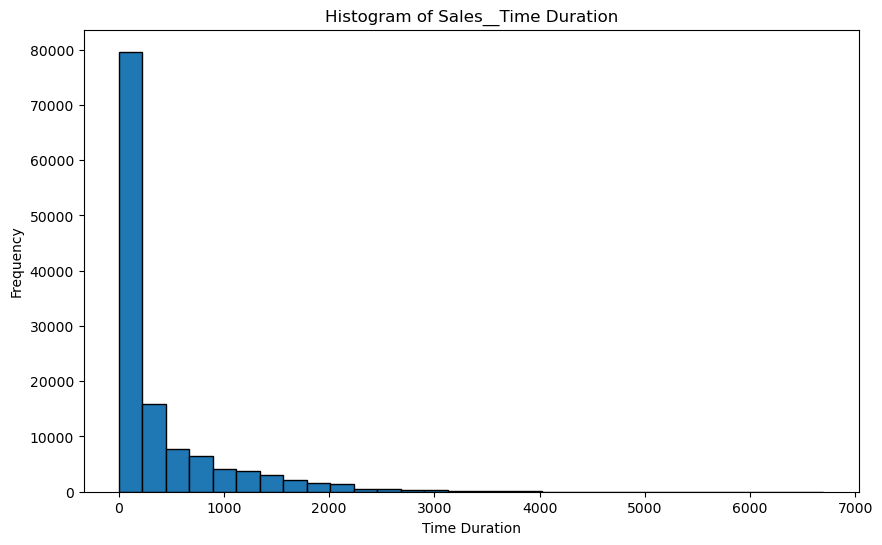

In [51]:
plt.figure(figsize=(10, 6))  
plt.hist(df['remainder__Time duration'], bins=30, edgecolor='black')  

plt.title('Histogram of Sales__Time Duration')
plt.xlabel('Time Duration')
plt.ylabel('Frequency')

plt.show()

In [12]:
# Divide the time duration into 4 catergories.
df['category_timeDuration'] = pd.cut(df['remainder__Time duration'], 
                        bins=[0, 30, 90, 360, float('inf')], 
                        labels=['0-30 days', '30-90 days', '90-360 days', '>360 days'])

In [13]:
# encode the label
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['y_label'] = label_encoder.fit_transform(df['category_timeDuration'])

In [14]:
y=df['y_label'] 

In [15]:
y.unique()

array([0, 1, 2, 3])

Select the suitable data features as X, for XGboost model, we dont need to consider the multicollinearity problems
That is to say, we can choose any numerical,catogory or flag data we want. the follwing features are setted as X in our model

In [16]:

features = [
    'num__Feedback Score',
    'cat__Listing Type_Auction', 'cat__Listing Type_AuctionWithBIN', 
    'cat__Listing Type_FixedPrice', 'cat__Listing Type_StoreInventory',
    'cat__Shipping Type_Calculated', 'cat__Shipping Type_CalculatedDomesticFlatInternational', 
    'cat__Shipping Type_Flat', 'cat__Shipping Type_FlatDomesticCalculatedInternational',
    'cat__Shipping Type_Free', 'cat__Shipping Type_FreePickup', 'cat__Shipping Type_Freight',
    'cat__Shipping Type_NotSpecified', 'cat__Top Rated Seller_False', 'cat__Top Rated Seller_True',
    'cat__Condition_Acceptable', 'cat__Condition_Brand New', 'cat__Condition_Certified - Refurbished',
    'cat__Condition_For parts or not working', 'cat__Condition_Good', 'cat__Condition_Like New', 
    'cat__Condition_New', 'cat__Condition_New other (see details)', 'cat__Condition_New with box', 
    'cat__Condition_New with defects', 'cat__Condition_New with tags', 'cat__Condition_New without box',
    'cat__Condition_New without tags', 'cat__Condition_New – Open box', 'cat__Condition_New/Factory Sealed',
    'cat__Condition_Open box', 'cat__Condition_Pre-owned', 'cat__Condition_Ungraded', 
    'cat__Condition_Used', 'cat__Condition_Very Good', 'cat__Condition_nan',
    'remainder__Positive Feedback %', 'remainder__Shipping Cost', 'remainder__Exchange_rate',
    'remainder__Price_in_USD', 'remainder__Store URL_flag', 'remainder__Large Image URL_flag',
    'remainder__Super Size Image URL_flag'
]

In [17]:
X  = df.loc[:, features]

In [18]:
X.shape

(127778, 43)

In [19]:
X.describe()

,num__Feedback Score,cat__Listing Type_Auction,cat__Listing Type_AuctionWithBIN,cat__Listing Type_FixedPrice,cat__Listing Type_StoreInventory,cat__Shipping Type_Calculated,cat__Shipping Type_CalculatedDomesticFlatInternational,cat__Shipping Type_Flat,cat__Shipping Type_FlatDomesticCalculatedInternational,cat__Shipping Type_Free,cat__Shipping Type_FreePickup,cat__Shipping Type_Freight,cat__Shipping Type_NotSpecified,cat__Top Rated Seller_False,cat__Top Rated Seller_True,cat__Condition_Acceptable,cat__Condition_Brand New,cat__Condition_Certified - Refurbished,cat__Condition_For parts or not working,cat__Condition_Good,cat__Condition_Like New,cat__Condition_New,cat__Condition_New other (see details),cat__Condition_New with box,cat__Condition_New with defects,cat__Condition_New with tags,cat__Condition_New without box,cat__Condition_New without tags,cat__Condition_New – Open box,cat__Condition_New/Factory Sealed,cat__Condition_Open box,cat__Condition_Pre-owned,cat__Condition_Ungraded,cat__Condition_Used,cat__Condition_Very Good,cat__Condition_nan,remainder__Positive Feedback %,remainder__Shipping Cost,remainder__Exchange_rate,remainder__Price_in_USD,remainder__Store URL_flag,remainder__Large Image URL_flag,remainder__Super Size Image URL_flag
count,1.277780e+05,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000,101801.000000,127778.000000,127778.000000,127778.000000,127778.000000,127778.000000
mean,4.626552e-17,0.019463,0.003639,0.975238,0.001659,0.192271,0.001057,0.227864,0.010863,0.552380,0.015472,0.000063,0.000031,0.518665,0.481335,0.015488,0.109628,0.000008,0.000188,0.078488,0.023627,0.550165,0.001573,0.000806,0.000102,0.024175,0.000078,0.004547,0.000008,0.000063,0.008812,0.005322,0.000063,0.072962,0.066709,0.037190,97.001042,1.814113,0.999667,27.701155,0.829947,0.960259,0.960259
std,1.000004e+00,0.138148,0.060216,0.155399,0.040699,0.394086,0.032487,0.419456,0.103657,0.497251,0.123422,0.007912,0.005595,0.499653,0.499653,0.123483,0.312426,0.002798,0.013704,0.268939,0.151884,0.497479,0.039631,0.028380,0.010086,0.153592,0.008846,0.067278,0.002798,0.007912,0.093459,0.072756,0.007912,0.260076,0.249519,0.189227,13.838517,4.885600,0.062376,325.932256,0.375681,0.195350,0.195350
min,-3.039162e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.007800,0.000000,0.000000,0.000000
25%,-3.035647e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.500000,0.000000,1.000000,7.500000,1.000000,1.000000,1.000000
50%,-3.018704e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.600000,0.000000,1.000000,13.890000,1.000000,1.000000,1.000000
75%,-2.912251e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0

In [20]:
# XGboost cannot input some null values
X.isnull().sum()

num__Feedback Score                                           0
cat__Listing Type_Auction                                     0
cat__Listing Type_AuctionWithBIN                              0
cat__Listing Type_FixedPrice                                  0
cat__Listing Type_StoreInventory                              0
cat__Shipping Type_Calculated                                 0
cat__Shipping Type_CalculatedDomesticFlatInternational        0
cat__Shipping Type_Flat                                       0
cat__Shipping Type_FlatDomesticCalculatedInternational        0
cat__Shipping Type_Free                                       0
cat__Shipping Type_FreePickup                                 0
cat__Shipping Type_Freight                                    0
cat__Shipping Type_NotSpecified                               0
cat__Top Rated Seller_False                                   0
cat__Top Rated Seller_True                                    0
cat__Condition_Acceptable               

In [21]:
# fill NA value in colume shipping cost by median
median_value = X['remainder__Shipping Cost'].median()
X['remainder__Shipping Cost'].fillna(median_value, inplace=True)

# model building process

In [22]:
!pip install xgboost

In [23]:
# convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. I will do it as follows.
# import XGBoost
import xgboost as xgb


# define data_dmatrix
data_dmatrix_raw = xgb.DMatrix(data=X,label=y)

In [24]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Train the XGBoost classifier
There are three types of parameters that we must set before running XGBoost. These parameters are as follows:-
General parameters
These parameters relate to which booster we are doing boosting. The common ones are tree or linear model.

Booster parameters
It depends on which booster we have chosen for boosting.

Learning task parameters
These parameters decide on the learning scenario. For example, regression tasks may use different parameters than ranking tasks.

Command line parameters
In addition there are command line parameters which relate to behaviour of CLI version of XGBoost.

The most important parameters that we should know about are as follows:-

learning_rate - It gives us the step size shrinkage which is used to prevent overfitting. Its range is [0,1].

max_depth - It determines how deeply each tree is allowed to grow during any boosting round.

subsample - It determines the percentage of samples used per tree. Low value of subsample can lead to underfitting.

colsample_bytree - It determines the percentage of features used per tree. High value of it can lead to overfitting.

n_estimators - It is the number of trees we want to build.

objective - It determines the loss function to be used in the process. For example, reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple models. These regularization parameters are as follows:-

gamma - It controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. It is supported only for tree-based learners.

alpha - It gives us the L1 regularization on leaf weights. A large value of it leads to more regularization.

lambda - It gives us the L2 regularization on leaf weights and is smoother than L1 regularization.

Though we are using trees as our base learners, we can also use XGBoost’s relatively less popular linear base learners and one other tree learner known as dart. We have to set the booster parameter to either gbtree (default), gblinear or dart.

In [25]:
#######################################

this following code is crucial for identifying key features, which not only improves model performance but also informs how we structure data collection in the application, focusing only on the most relevant data. This targeted approach enhances both predictive accuracy and user interaction with the application.

In [26]:
# trains an XGBoost model, retrieves the feature importances, and displays them in descending order.
# Train an initial XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)
model.fit(X_train, y_train)

# Get feature importance
feature_importances = model.feature_importances_

# Combine features and their importance into a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)

                                                   feature  importance
3                             cat__Listing Type_FixedPrice    0.277666
1                                cat__Listing Type_Auction    0.192795
9                                  cat__Shipping Type_Free    0.093286
4                         cat__Listing Type_StoreInventory    0.056377
40                               remainder__Store URL_flag    0.039476
21                                      cat__Condition_New    0.025801
0                                      num__Feedback Score    0.023771
7                                  cat__Shipping Type_Flat    0.023189
16                                cat__Condition_Brand New    0.022064
13                             cat__Top Rated Seller_False    0.021407
36                          remainder__Positive Feedback %    0.019849
25                            cat__Condition_New with tags    0.019451
5                            cat__Shipping Type_Calculated    0.018940
38    

1.	Top Features: The top features with the highest importance scores include:
•	cat__Listing Type_FixedPrice (0.273443)
•	cat__Listing Type_Auction (0.180365)
•	cat__Shipping Type_Free (0.088494)
•	cat__Listing Type_StoreInventory (0.062191)
•	remainder__Store URL_flag (0.038157)
•	These features contribute the most to the model’s decisions and are likely the most influential.
2.	Low or Zero Importance Features: Several features have extremely low importance, including:
•	cat__Listing Type_AuctionWithBIN, cat__Condition_For parts or not working, cat__Shipping Type_NotSpecified, cat__Condition_New – Open box, and several others with 0 importance.
•	These features are unlikely to contribute to model performance and could be removed to reduce model complexity and computation time.
3.	Moderate Importance Features: Features with moderate importance, such as num__Feedback Score, cat__Condition_New, and remainder__Positive Feedback %, can be retained if they provide useful differentiation for the classification task.

In [27]:
accuracy_beforeSelect = model.score(X_test, y_test)

In [28]:
selected_features = feature_importance_df[feature_importance_df['importance'] > 0.01]['feature'].tolist()

In [29]:
selected_features

['cat__Listing Type_FixedPrice',
 'cat__Listing Type_Auction',
 'cat__Shipping Type_Free',
 'cat__Listing Type_StoreInventory',
 'remainder__Store URL_flag',
 'cat__Condition_New',
 'num__Feedback Score',
 'cat__Shipping Type_Flat',
 'cat__Condition_Brand New',
 'cat__Top Rated Seller_False',
 'remainder__Positive Feedback %',
 'cat__Condition_New with tags',
 'cat__Shipping Type_Calculated',
 'remainder__Exchange_rate',
 'cat__Condition_Good',
 'remainder__Shipping Cost',
 'cat__Condition_nan',
 'cat__Condition_New without tags',
 'remainder__Large Image URL_flag',
 'cat__Condition_Very Good',
 'remainder__Price_in_USD',
 'cat__Condition_Acceptable']

In [30]:
# Create a new dataset with only selected features
X_selected = X[selected_features]
# Build the model using top importantce features and get the score 
# Re-train the model with selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model_selected = xgb.XGBClassifier(objective='multi:softmax', num_class=4)
model_selected.fit(X_train_selected, y_train)

# Evaluate model performance
accuracy_afterSelect = model_selected.score(X_test_selected, y_test)

In [31]:
accuracy_afterSelect

0.5960635467209265

In [32]:
accuracy_beforeSelect

0.5928549068711848

By comparison, the model accuracy improved after removing non-important features.
Therefore, the remaining features can serve as data input options for users

# Model Improvement

In [33]:
# import XGBClassifier 
from xgboost import XGBClassifier


# Configure the model:
# Declare parameters to reduce overfitting
# Cautions: the following parameters are just setted by intuition. we will tuin them next.
params = {
    'objective': 'multi:softmax',   # Specifies a multi-class classification objective
    'num_class': 4,                 # Specifies the number of classes in the target variable
    'max_depth': 8,                 # Limits the depth of each tree to control complexity
    'alpha': 10,                    # Adds L1 regularization to reduce overfitting
    'learning_rate': 0.3,           # Sets the learning rate to control the impact of each tree
    'n_estimators': 150             # Specifies the number of trees (boosting rounds)
}

# Instantiate the classifier with the specified parameters
xgb_clf = XGBClassifier(**params)

# Fit the classifier to the training data
xgb_clf.fit(X_train_selected, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None, num_class=4, ...)

In [34]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test_selected)

In [35]:
# check accuracy score
# this is the accuracy result withou any tuning
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.6082


# Tuning 1:one more step on evaluation on ovefitting: k-fold Cross Validation Method
To build more robust models with XGBoost, we must do k-fold cross validation. In this way, we ensure that the original training dataset is used for both training and validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation using the cv() method. In this method, we will specify several parameters which are as follows:-

nfolds - This parameter specifies the number of cross-validation sets we want to build.

num_boost_round - It denotes the number of trees we build.

metrics - It is the performance evaluation metrics to be considered during CV.

as_pandas - It is used to return the results in a pandas DataFrame.

early_stopping_rounds - This parameter stops training of the model early if the hold-out metric does not improve for a given number of rounds.

seed - This parameter is used for reproducibility of results.



In [39]:
from xgboost import DMatrix

In [40]:
from xgboost import cv
import xgboost as xgb

# Convert the dataset to DMatrix format
data_dmatrix = DMatrix(data=X_train_selected, label=y_train)

# Define parameters
params = {
    'objective': 'multi:softmax',   # Multi-class classification
    'num_class': 4,                 # Number of classes
    'colsample_bytree': 0.3,        # Column sampling for each tree
    'learning_rate': 0.3,           # Step size shrinkage
    'max_depth': 8,                 # Maximum tree depth
    'alpha': 10                     # L1 regularization term
}

# Perform cross-validation with early stopping
xgb_cv_results = cv(
    dtrain=data_dmatrix,
    params=params,
    nfold=5,                           # Number of folds in k-fold CV
    num_boost_round=150,               # Maximum number of boosting rounds
    early_stopping_rounds=10,          # Stop if no improvement after 10 rounds
    metrics="mlogloss",                # Evaluation metric
    as_pandas=True,
    seed=123
)

# Display cross-validation results
print(xgb_cv_results)
print(f"Optimal number of boosting rounds: {len(xgb_cv_results)}")
print(f"Best mlogloss: {xgb_cv_results['test-mlogloss-mean'].min():.4f}")

     train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  test-mlogloss-std
0               1.309623            0.000545            1.310560           0.000501
1               1.263511            0.000581            1.265259           0.000595
2               1.227324            0.001125            1.230077           0.000765
3               1.200096            0.001164            1.203440           0.001069
4               1.169514            0.000883            1.174093           0.001394
5               1.157999            0.000644            1.163078           0.001710
6               1.147213            0.000788            1.152745           0.001767
7               1.139509            0.000904            1.145209           0.002072
8               1.121150            0.000812            1.127747           0.001970
9               1.102354            0.001049            1.109891           0.001689
10              1.093830            0.001097            1.101661           0

Problems found:

Training and Test Log Loss:

•	train-mlogloss-mean: This is the average log loss across all training folds at each boosting round.
•	test-mlogloss-mean: This is the average log loss across all test folds at each boosting round. It’s the primary indicator of the model’s performance on unseen data.
•	As the boosting rounds increase, both training and test log loss decrease, which generally indicates that the model is learning.


Best Performance:

•	The lowest test log loss (0.9501) is achieved at the 150th boosting round.
•	The log loss is still decreasing slightly even at this point, but the early stopping criterion was likely not triggered because you set num_boost_round=150 (the maximum number of boosting rounds) without allowing enough rounds to further optimize. If you increase num_boost_round, you may see further reduction in log loss, but this could also risk overfitting.


Stability of Log Loss:

•	The difference between train-mlogloss-mean and test-mlogloss-mean remains relatively small, suggesting that overfitting is under control. The regularization (alpha=10) and maximum depth (max_depth=8) appear to be effective in balancing model complexity.

# Next steps:
1.Increase num_boost_round
2.Refine Learning Rate to a lower number
3.Fine-tune Other Hyperparameters:

In [42]:
params = {
    'objective': 'multi:softmax',
    'num_class': 4,
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,           # Reduced learning rate
    'max_depth': 15,                # Add more depth in moedl
    'alpha': 10,
    'lambda': 1                      # Added L2 regularization
}

# Increase num_boost_round and keep early stopping for further exploration
xgb_cv_results = cv(
    dtrain=data_dmatrix,
    params=params,
    nfold=5,
    num_boost_round=1500,             # Increased number of rounds to 1500
    early_stopping_rounds=10,
    metrics="mlogloss",
    as_pandas=True,
    seed=123
)

print(xgb_cv_results)
print(f"Optimal number of boosting rounds: {len(xgb_cv_results)}")
print(f"Best mlogloss: {xgb_cv_results['test-mlogloss-mean'].min():.4f}")

      train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  test-mlogloss-std
0                1.356334            0.000057            1.356904           0.000224
1                1.333161            0.000120            1.334224           0.000421
2                1.311314            0.000225            1.312996           0.000569
3                1.293996            0.000248            1.296022           0.000733
4                1.271540            0.000197            1.274438           0.000763
5                1.261987            0.000335            1.265125           0.000690
6                1.252597            0.000339            1.255999           0.000755
7                1.244937            0.000372            1.248415           0.000902
8                1.228701            0.000445            1.232724           0.000875
9                1.211654            0.000633            1.216520           0.000767
10               1.200957            0.000598            1.206026

# No overfitting problems
When both the training and validation losses decrease and their gap remains small, it typically indicates that the model is not overfitting. Here’s why:

1. Consistent Performance on Training and Validation Data

	•	During training, the model optimizes its performance on the training data. Ideally, the patterns learned by the model on the training data should generalize well to the validation data.
	•	When both training and validation losses are decreasing with a small difference between them, this suggests the model is not only performing well on the training data but also generalizing effectively to unseen data (the validation set). This is usually a sign that the model is not overfitting.

2. Overfitting Typically Shows Low Training Loss and High Validation Loss

	•	Overfitting usually occurs when the model performs exceptionally well on the training data, resulting in a low training loss, but struggles on the validation data, leading to a noticeably higher validation loss.
	•	A large gap between training and validation losses indicates that the model might be “memorizing” specific details and noise in the training data rather than learning patterns that generalize well.
	•	When the training and validation losses are close, it suggests that the model is capturing patterns that are relevant to both datasets rather than fitting to noise or specific details in the training data.

3. Continued Decrease in Validation Loss Shows the Model is Still Learning Generalizable Patterns

	•	As long as the validation loss is also decreasing, it indicates that the model’s learning is still benefiting the validation performance, meaning it is learning generalizable features.
	•	When the validation loss starts to increase while training loss continues to decrease, this often indicates that the model is beginning to memorize the training data rather than learning useful, generalizable features, which is a common sign of overfitting.


# Tuning Process 2: to achieve a better learning curve & better punishment effects

In [44]:
from xgboost import train

# Revised parameters for tuning
final_params = {
    'objective': 'multi:softmax',   
    'num_class': 4,                 
    'colsample_bytree': 0.3,       
    'learning_rate': 0.05,          # Lower the learning rate
    'max_depth': 15,                 # Reduce tree depth for better generalization
    'alpha': 5,                    # L1 regularization term to lower it
    'lambda': 1                     # L2 regularization term, remain the same
}

# Define evaluation set if you want early stopping (optional)
# Typically this would be a validation set, not the training set
evals = [(data_dmatrix, 'train')]

# Train the final model using the optimal num_boost_round found in cross-validation (replace with actual value)
best_num_boost_round = 1500  # Replace with the optimal number you obtained
final_model = train(
    params=final_params,
    dtrain=data_dmatrix,
    num_boost_round=best_num_boost_round,
    evals=evals,                    # Track training progress (optional)
    early_stopping_rounds=10        # Stops if no improvement after 10 rounds (optional)
)

[0]	train-mlogloss:1.36992
[1]	train-mlogloss:1.35634
[2]	train-mlogloss:1.34277
[3]	train-mlogloss:1.33174
[4]	train-mlogloss:1.31653
[5]	train-mlogloss:1.30997
[6]	train-mlogloss:1.30338
[7]	train-mlogloss:1.29795
[8]	train-mlogloss:1.28611
[9]	train-mlogloss:1.27355
[10]	train-mlogloss:1.26517
[11]	train-mlogloss:1.25353
[12]	train-mlogloss:1.24861
[13]	train-mlogloss:1.24033
[14]	train-mlogloss:1.23535
[15]	train-mlogloss:1.22779
[16]	train-mlogloss:1.21868
[17]	train-mlogloss:1.21181
[18]	train-mlogloss:1.20613
[19]	train-mlogloss:1.20043
[20]	train-mlogloss:1.19248
[21]	train-mlogloss:1.18813
[22]	train-mlogloss:1.18300
[23]	train-mlogloss:1.17519
[24]	train-mlogloss:1.16999
[25]	train-mlogloss:1.16038
[26]	train-mlogloss:1.15711
[27]	train-mlogloss:1.15460
[28]	train-mlogloss:1.15073
[29]	train-mlogloss:1.14539
[30]	train-mlogloss:1.14199
[31]	train-mlogloss:1.13760
[32]	train-mlogloss:1.13327
[33]	train-mlogloss:1.13043
[34]	train-mlogloss:1.12819
[35]	train-mlogloss:1.12465
[3

[287]	train-mlogloss:0.86293
[288]	train-mlogloss:0.86211
[289]	train-mlogloss:0.86182
[290]	train-mlogloss:0.86139
[291]	train-mlogloss:0.86114
[292]	train-mlogloss:0.86090
[293]	train-mlogloss:0.86052
[294]	train-mlogloss:0.86028
[295]	train-mlogloss:0.85988
[296]	train-mlogloss:0.85979
[297]	train-mlogloss:0.85933
[298]	train-mlogloss:0.85903
[299]	train-mlogloss:0.85891
[300]	train-mlogloss:0.85811
[301]	train-mlogloss:0.85790
[302]	train-mlogloss:0.85742
[303]	train-mlogloss:0.85679
[304]	train-mlogloss:0.85606
[305]	train-mlogloss:0.85532
[306]	train-mlogloss:0.85498
[307]	train-mlogloss:0.85460
[308]	train-mlogloss:0.85415
[309]	train-mlogloss:0.85383
[310]	train-mlogloss:0.85382
[311]	train-mlogloss:0.85347
[312]	train-mlogloss:0.85307
[313]	train-mlogloss:0.85243
[314]	train-mlogloss:0.85236
[315]	train-mlogloss:0.85209
[316]	train-mlogloss:0.85206
[317]	train-mlogloss:0.85177
[318]	train-mlogloss:0.85145
[319]	train-mlogloss:0.85129
[320]	train-mlogloss:0.85098
[321]	train-ml

[570]	train-mlogloss:0.80020
[571]	train-mlogloss:0.79975
[572]	train-mlogloss:0.79966
[573]	train-mlogloss:0.79959
[574]	train-mlogloss:0.79948
[575]	train-mlogloss:0.79933
[576]	train-mlogloss:0.79928
[577]	train-mlogloss:0.79919
[578]	train-mlogloss:0.79914
[579]	train-mlogloss:0.79913
[580]	train-mlogloss:0.79884
[581]	train-mlogloss:0.79832
[582]	train-mlogloss:0.79812
[583]	train-mlogloss:0.79781
[584]	train-mlogloss:0.79751
[585]	train-mlogloss:0.79731
[586]	train-mlogloss:0.79698
[587]	train-mlogloss:0.79672
[588]	train-mlogloss:0.79671
[589]	train-mlogloss:0.79663
[590]	train-mlogloss:0.79642
[591]	train-mlogloss:0.79636
[592]	train-mlogloss:0.79630
[593]	train-mlogloss:0.79598
[594]	train-mlogloss:0.79597
[595]	train-mlogloss:0.79579
[596]	train-mlogloss:0.79564
[597]	train-mlogloss:0.79561
[598]	train-mlogloss:0.79551
[599]	train-mlogloss:0.79527
[600]	train-mlogloss:0.79489
[601]	train-mlogloss:0.79463
[602]	train-mlogloss:0.79459
[603]	train-mlogloss:0.79443
[604]	train-ml

[853]	train-mlogloss:0.76241
[854]	train-mlogloss:0.76221
[855]	train-mlogloss:0.76216
[856]	train-mlogloss:0.76216
[857]	train-mlogloss:0.76211
[858]	train-mlogloss:0.76203
[859]	train-mlogloss:0.76185
[860]	train-mlogloss:0.76162
[861]	train-mlogloss:0.76133
[862]	train-mlogloss:0.76120
[863]	train-mlogloss:0.76119
[864]	train-mlogloss:0.76116
[865]	train-mlogloss:0.76090
[866]	train-mlogloss:0.76074
[867]	train-mlogloss:0.76065
[868]	train-mlogloss:0.76052
[869]	train-mlogloss:0.76023
[870]	train-mlogloss:0.76020
[871]	train-mlogloss:0.76013
[872]	train-mlogloss:0.76008
[873]	train-mlogloss:0.75997
[874]	train-mlogloss:0.75989
[875]	train-mlogloss:0.75974
[876]	train-mlogloss:0.75951
[877]	train-mlogloss:0.75950
[878]	train-mlogloss:0.75945
[879]	train-mlogloss:0.75938
[880]	train-mlogloss:0.75916
[881]	train-mlogloss:0.75904
[882]	train-mlogloss:0.75891
[883]	train-mlogloss:0.75883
[884]	train-mlogloss:0.75876
[885]	train-mlogloss:0.75869
[886]	train-mlogloss:0.75861
[887]	train-ml

[1131]	train-mlogloss:0.73728
[1132]	train-mlogloss:0.73726
[1133]	train-mlogloss:0.73725
[1134]	train-mlogloss:0.73724
[1135]	train-mlogloss:0.73713
[1136]	train-mlogloss:0.73710
[1137]	train-mlogloss:0.73684
[1138]	train-mlogloss:0.73677
[1139]	train-mlogloss:0.73671
[1140]	train-mlogloss:0.73670
[1141]	train-mlogloss:0.73648
[1142]	train-mlogloss:0.73647
[1143]	train-mlogloss:0.73645
[1144]	train-mlogloss:0.73636
[1145]	train-mlogloss:0.73609
[1146]	train-mlogloss:0.73607
[1147]	train-mlogloss:0.73595
[1148]	train-mlogloss:0.73591
[1149]	train-mlogloss:0.73578
[1150]	train-mlogloss:0.73566
[1151]	train-mlogloss:0.73559
[1152]	train-mlogloss:0.73558
[1153]	train-mlogloss:0.73558
[1154]	train-mlogloss:0.73556
[1155]	train-mlogloss:0.73555
[1156]	train-mlogloss:0.73540
[1157]	train-mlogloss:0.73525
[1158]	train-mlogloss:0.73523
[1159]	train-mlogloss:0.73513
[1160]	train-mlogloss:0.73499
[1161]	train-mlogloss:0.73498
[1162]	train-mlogloss:0.73497
[1163]	train-mlogloss:0.73496
[1164]	tra

[1405]	train-mlogloss:0.71683
[1406]	train-mlogloss:0.71672
[1407]	train-mlogloss:0.71657
[1408]	train-mlogloss:0.71656
[1409]	train-mlogloss:0.71654
[1410]	train-mlogloss:0.71649
[1411]	train-mlogloss:0.71645
[1412]	train-mlogloss:0.71633
[1413]	train-mlogloss:0.71632
[1414]	train-mlogloss:0.71621
[1415]	train-mlogloss:0.71606
[1416]	train-mlogloss:0.71599
[1417]	train-mlogloss:0.71598
[1418]	train-mlogloss:0.71591
[1419]	train-mlogloss:0.71585
[1420]	train-mlogloss:0.71585
[1421]	train-mlogloss:0.71576
[1422]	train-mlogloss:0.71576
[1423]	train-mlogloss:0.71574
[1424]	train-mlogloss:0.71567
[1425]	train-mlogloss:0.71559
[1426]	train-mlogloss:0.71549
[1427]	train-mlogloss:0.71545
[1428]	train-mlogloss:0.71542
[1429]	train-mlogloss:0.71535
[1430]	train-mlogloss:0.71530
[1431]	train-mlogloss:0.71505
[1432]	train-mlogloss:0.71504
[1433]	train-mlogloss:0.71504
[1434]	train-mlogloss:0.71503
[1435]	train-mlogloss:0.71502
[1436]	train-mlogloss:0.71485
[1437]	train-mlogloss:0.71476
[1438]	tra

# Model evaluation

In [45]:
# Make predictions on the test set
y_pred = final_model.predict(DMatrix(X_test_selected))  # Assuming X_test is your test data

In [46]:
# A classification report provides detailed information for each class, including precision, recall, and F1-score.
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))  # y_test is the true labels for the test set

              precision    recall  f1-score   support

           0       0.74      0.53      0.62      3663
           1       0.66      0.67      0.67      8072
           2       0.50      0.46      0.48      5880
           3       0.63      0.75      0.68      7941

    accuracy                           0.62     25556
   macro avg       0.63      0.60      0.61     25556
weighted avg       0.63      0.62      0.62     25556



In [47]:
# in comparison, the accuracy is 0.62, which is increasing from 0.60 before. our model tuning works!!!

#3. Confusion Matrix

A confusion matrix allows you to observe the actual versus predicted labels, providing insights into specific areas where the model may be misclassifying.

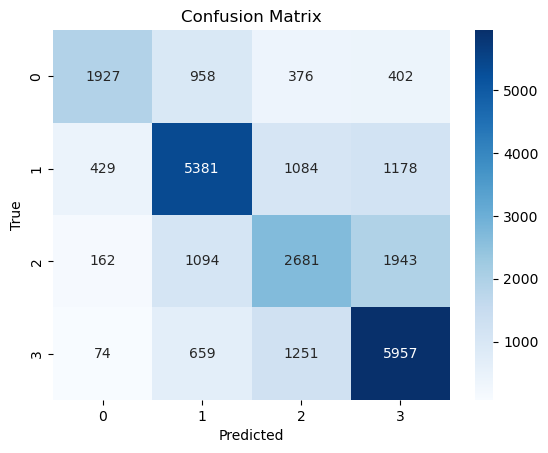

In [48]:
from sklearn.metrics import confusion_matrix
class_names = [0, 1, 2, 3] 

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

4. Overall Accuracy

Calculate the accuracy of the model, which is the proportion of correct predictions over the total number of predictions.

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

Overall Accuracy: 0.6240


# Result

summary:
1. have four classes of roughly equal distribution, random guessing would yield about 25% accuracy. In this case, 62% would be a notable improvement.
2. our class is imbalance, for marjority data lie in label 0 or 1, and these two class got the precision of 0.74 and 0.66, which is pretty high

Based on the confusion matrix and classification report, here’s an evaluation of the model’s performance for the four classes:

Class-Level Evaluation

	1.	Class 0:
	•	Precision: 0.74 – When the model predicts Class 0, it is correct 74% of the time.
	•	Recall: 0.53 – Only 53% of true Class 0 instances are correctly identified.
	•	F1-Score: 0.62 – The model’s balance between precision and recall is moderate for this class.
	•	Insight: The relatively low recall suggests the model often misses true Class 0 instances, potentially misclassifying them as other classes.
	2.	Class 1:
	•	Precision: 0.66 – Correctly identifies Class 1 instances 66% of the time.
	•	Recall: 0.67 – The model captures 67% of true Class 1 instances.
	•	F1-Score: 0.67 – Indicates a balanced performance for this class.
	•	Insight: Class 1 has relatively balanced precision and recall, meaning the model is reasonably accurate at identifying and recalling Class 1 instances.
	3.	Class 2:
	•	Precision: 0.50 – Correctly predicts Class 2 half of the time, indicating moderate misclassification with other classes.
	•	Recall: 0.46 – Only 46% of true Class 2 instances are correctly identified.
	•	F1-Score: 0.48 – Indicates relatively poor performance compared to other classes.
	•	Insight: The low precision and recall for Class 2 show that the model struggles to accurately identify and recall instances of this class. Additional tuning may be needed here.
	4.	Class 3:
	•	Precision: 0.63 – 63% of Class 3 predictions are correct.
	•	Recall: 0.75 – High recall indicates that the model successfully identifies most true Class 3 instances.
	•	F1-Score: 0.68 – Shows relatively strong performance.
	•	Insight: The high recall for Class 3 suggests the model is better at capturing true Class 3 instances than other classes, though it still misclassifies some instances.

Overall Model Performance

	•	Accuracy: 0.62 – The model correctly classifies 62.4% of the instances across all classes.
	•	Macro Average:
	•	Precision: 0.63
	•	Recall: 0.60
	•	F1-Score: 0.61
	•	Interpretation: These values represent the model’s performance averaged across all classes, treating each class equally. The relatively balanced macro F1-score suggests that the model performs moderately across all classes but struggles more with certain ones, particularly Class 2.
	•	Weighted Average:
	•	Precision: 0.63
	•	Recall: 0.62
	•	F1-Score: 0.62
	•	Interpretation: The weighted average considers the class distribution, indicating the model’s performance overall, with some influence from the more frequently occurring classes (Class 1 and Class 3).

Key Insights and Recommendations

	•	Balanced Performance: The model has a balanced performance for Classes 1 and 3, with moderate precision, recall, and F1-scores.
	•	Class-Specific Improvement Needed: The lower F1-score for Class 2 indicates that the model struggles to classify this category accurately, likely leading to misclassifications with other classes.
	•	Potential Adjustments:
	•	Consider further tuning, especially focusing on Class 2.
	•	Explore additional feature engineering or techniques like adjusting class weights or oversampling Class 2 to improve its recall and precision.

In summary, the model performs moderately well, with an overall accuracy of 62.4%, but there is room for improvement, particularly for Class 2.